In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn=KNeighborsClassifier(n_neighbors=2)
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt



In [46]:
df = pd.read_csv('/media/reindrairawan/New Volume/Data E/REPOSITORY/PYTHON/ProjectKuliah/NLP/ProjectUas(Sentimen_Analisis)/modelSentimen/hasilsentimenenglish.csv')
df.columns = df.columns.str.replace('Unnamed: 0', 'text')

df

,text,neg,neu,pos,compound,comp_score
0,I'm surprised that Citayam Fashion Week is the...,0.140,0.676,0.184,0.2910,pos
1,rt thefirstxxviii nahh even though dri didn't ...,0.064,0.936,0.000,-0.0572,neg
2,"rt valosenadya, let's be honest, scbd fashion ...",0.000,0.602,0.398,0.7650,pos
3,"rt suckerzpunch, this rapper doesn't sell well...",0.068,0.786,0.146,0.2684,pos
4,nasi citayam fashion week videodreamcoid video...,0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...
1444,there's nothing wrong with scbd citayam fashio...,0.000,0.677,0.323,0.9355,pos
1445,the trend called citayam fashion week in scbd ...,0.000,1.000,0.000,0.0000,neu
1446,"RT Vivacoid, Dukuh area full of teenagers, hol...",0.000,1.000,0.000,0.0000,neu
1447,they say scbd fashion week is cool too don't g...,0.000,0.777,0.223,0.8020,pos


In [47]:
df['comp_score'] = enc.fit_transform(df['comp_score'].values)
df['text'] = enc.fit_transform(df['text'].values)

In [48]:
datax = df.drop(columns='comp_score')
datay = df['comp_score']
datax

,text,neg,neu,pos,compound
0,173,0.140,0.676,0.184,0.2910
1,1088,0.064,0.936,0.000,-0.0572
2,1102,0.000,0.602,0.398,0.7650
3,1076,0.068,0.786,0.146,0.2684
4,817,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
1444,1351,0.000,0.677,0.323,0.9355
1445,1343,0.000,1.000,0.000,0.0000
1446,272,0.000,1.000,0.000,0.0000
1447,1352,0.000,0.777,0.223,0.8020


In [49]:


x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.20, random_state=50)
knn.fit(datax, datay)

KNeighborsClassifier(n_neighbors=2)

0.8241379310344827
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        45
           1       0.76      0.91      0.83       129
           2       1.00      0.66      0.80       116

    accuracy                           0.82       290
   macro avg       0.84      0.86      0.83       290
weighted avg       0.86      0.82      0.82       290

Akurasi:  0.8241379310344827


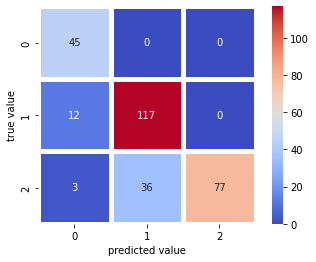

In [50]:

pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print('Akurasi: ', knn.score(x_test, y_test))

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()